<a href="https://colab.research.google.com/github/Prasanna-03/-LGMVIP--DataScience/blob/main/handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [ ]:
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2618 - accuracy: 0.9234
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1047 - accuracy: 0.9674
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0706 - accuracy: 0.9777


In [ ]:
model.save('handwritten.model')


INFO:tensorflow:Assets written to: handwritten.model/assets


In [ ]:
model = tf.keras.models.load_model('handwritten.model')


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 1ms/step - loss: 0.0978 - accuracy: 0.9686


In [ ]:
print(loss)
print(accuracy)



0.09780056029558182
0.9685999751091003


This digit is probably a 9


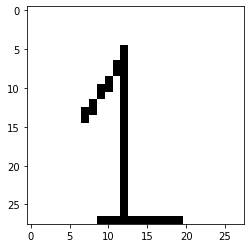

This digit is probably a 2


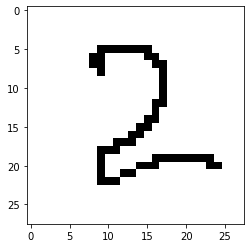

This digit is probably a 2


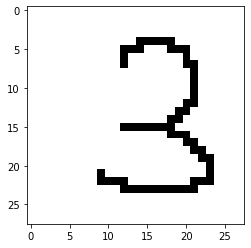

This digit is probably a 9


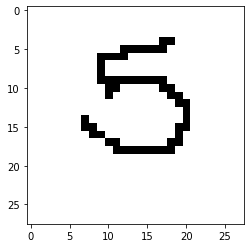

This digit is probably a 6


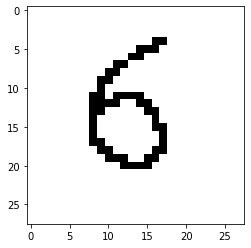

This digit is probably a 7


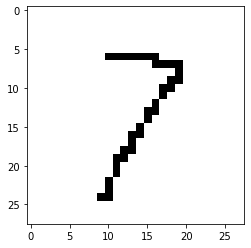

This digit is probably a 9


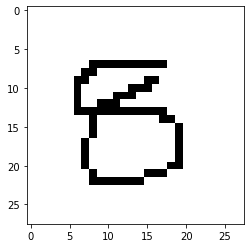

In [ ]:
image_number=1
while os.path.isfile(f"/content/drive/MyDrive/digits/digit{image_number}.png"):
	
	img = cv2.imread(f"/content/drive/MyDrive/digits/digit{image_number}.png")[:,:,0]
	img = np.invert(np.array([img]))
	prediction = model.predict(img)
	print(f"This digit is probably a {np.argmax(prediction)}")
	plt.imshow(img[0], cmap=plt.cm.binary)
	plt.show()

	image_number +=1